In [1]:
# списано отсюда https://amueller.github.io/word_cloud/auto_examples/masked.html
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud

In [2]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "prince_lemmas.txt" in locals() else os.getcwd()


In [3]:
# Read the whole text.
text = open(path.join(d, 'prince_lemmas.txt')).read()

In [4]:
#  нужно проверить, чтобы были цифры 255, если нет, исправить функцией из предыдущей ячейки 
mask = np.array(Image.open("Prince_image.png"))
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# исправление картинки списано отсюда: https://stackoverflow.com/questions/50435433/wordcloud-words-not-fitting-to-mask
# почему-то не работает с != 255, но здесь мне хватает и семерки
def transform_zeros(val):
    if val == 0: 
       return 255
    else:
       return val

In [6]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

In [7]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [10]:
wc = WordCloud(background_color="white", max_words=2000, mask=maskable_image,
                contour_width=3, contour_color='steelblue')

In [11]:
# generate word cloud
wc.generate(text)

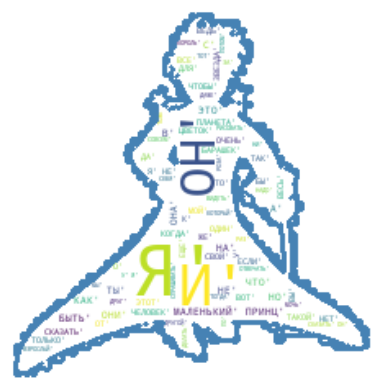

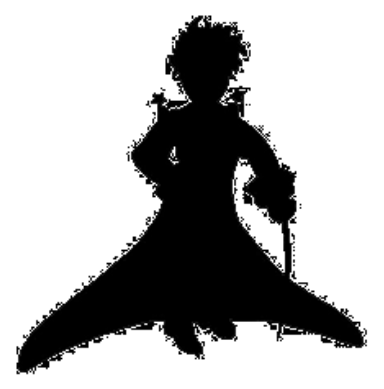

In [12]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(maskable_image, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()